# Exploratory analysis of online transactions



Our client is an e-commerce site that sells wholesale electronics. You have been contracted to explore the dataset and identify whether a given transaction is fraudulent or not. You only have information about each user’s first transaction on the customer's website. If you fail to identify a fraudulent transaction, our client loses money equivalent to the price of the fraudulently purchased product. If you incorrectly flag a real transaction as fraudulent, it inconveniences the customers whose valid transactions are flagged.


In [1]:

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os




##### *Q1*  -- Load the Dataset into a dataframe called transactions


In [3]:
os.chdir('C:\\Users\\rajku\\OneDrive\\Documents\\Training\\Big Data\\Python\\Proff Kemal Oflus\\takeHomeQuiz')
os.listdir()

['.ipynb_checkpoints',
 'exploratoryDataAnalysis- Take Home.ipynb',
 'RajD - Exploratory_Data_Analysis_Quiz1 - Copy.ipynb',
 'RajD - Exploratory_Data_Analysis_Quiz1.ipynb',
 'transactions.csv',
 '__MACOSX']

Assuming Column 1 is the index from the original table, there are 10 features and a target value "class"; of these 10 features *user_id, device_id, source, browser, sex* are categorical values. Although a numerical value, IP adress is actually a categorical value that represents the user's location. *Age and purchase_value* are continuous variables. 

Interestingly, the dataset also contains information about the user's *signup_time* and *purchase_time*, having done some analysis in the past, the time in between purchase time and signup time has impact on the classification of transaction if its fraudulent or not.

Let's create a new variable *timeBetween* to represent this time period in term sof seconds.

In [4]:
Trans=pd.read_csv("transactions.csv")
Trans.describe()
Trans.shape
Trans.columns

Index(['Column 1', 'user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [5]:
import datetime

In [6]:
# removing insignificant column 1
Trans.drop(['Column 1'], axis=1, inplace=True)
Trans.shape

(120000, 11)

In [7]:
Trans.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [8]:
Trans.describe()

,user_id,purchase_value,age,ip_address,class
count,120000.000000,120000.000000,120000.000000,1.200000e+05,120000.000000
mean,200320.280100,36.881475,33.125250,2.151550e+09,0.093875
std,115361.945935,18.325855,8.617081,1.248314e+09,0.291656
min,2.000000,9.000000,18.000000,9.344714e+04,0.000000
25%,100925.500000,22.000000,27.000000,1.085345e+09,0.000000
50%,200037.500000,34.000000,33.000000,2.155238e+09,0.000000
75%,300395.500000,49.000000,39.000000,3.241268e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002471423CE48>,
      dtype=object)

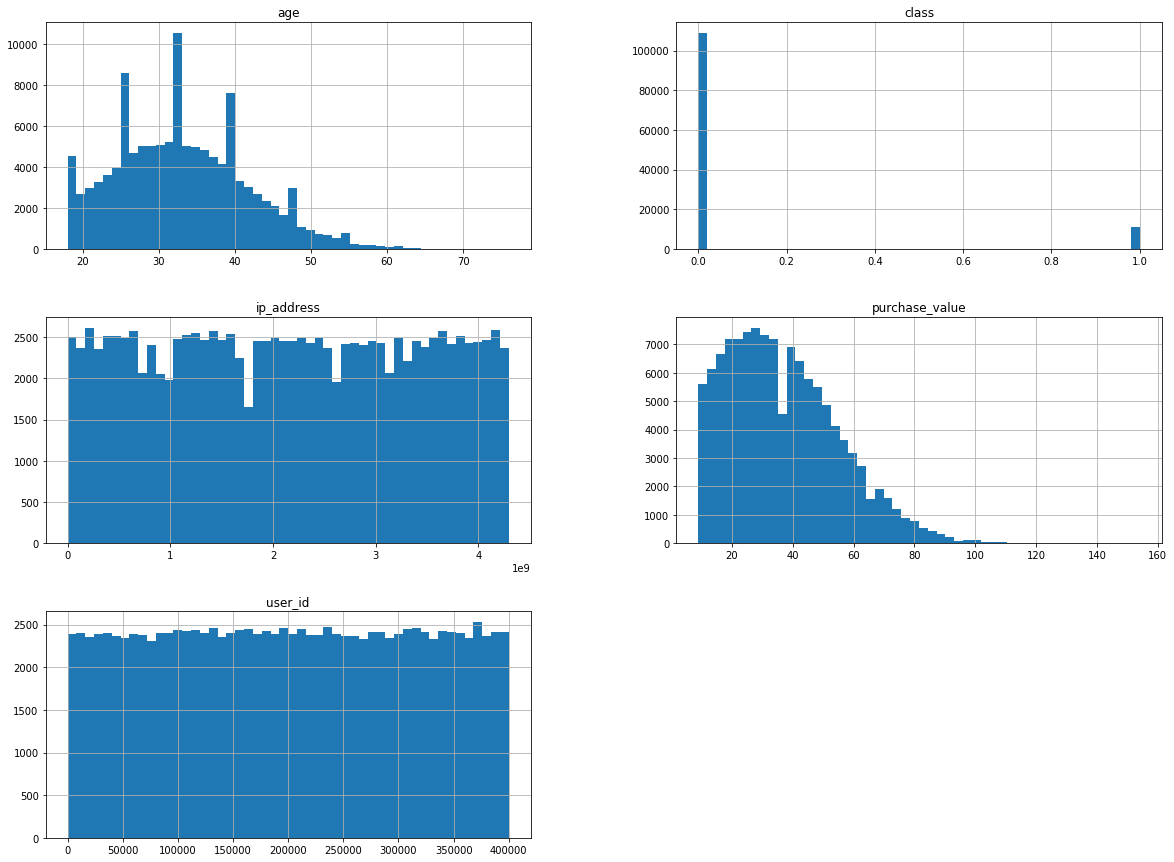

In [10]:
Trans.hist(bins=50, figsize=(20,15))

###### Q2 ---- Create a new column *timeBetween* as described above

In [11]:
Trans['purchase_time']=pd.to_datetime(Trans['purchase_time'])

In [12]:
Trans['signup_time']=pd.to_datetime(Trans['signup_time'])

In [13]:
Trans['timeBetw']=Trans['purchase_time']-Trans['signup_time']

In [14]:
Trans['timeBetw']=Trans['timeBetw'].astype('timedelta64[s]')

In [16]:
Trans.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,timeBetw
0,285108,2015-07-15 04:36:00,2015-09-10 14:17:00,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,4959660.0
1,131009,2015-01-24 12:29:00,2015-04-13 04:53:00,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,6798240.0
2,328855,2015-03-11 00:54:00,2015-04-05 12:23:00,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,2201340.0
3,229053,2015-01-07 13:19:00,2015-01-09 10:12:00,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,161580.0
4,108439,2015-02-08 21:11:00,2015-04-09 14:26:00,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,5159700.0


Let's start getting familiar with our dataset to get an idea about the features (input variables) and the target variable.

## Input Variables

### Continuous Variables

In [17]:
# Counts:
numberOfUsers = len(Trans.user_id.unique())
print('number of users: ', numberOfUsers)

number of users:  120000


In [18]:
numberOfDevices = len(Trans.device_id.unique())
print('number of devices: ', numberOfDevices)

number of devices:  110599


In [19]:
Trans.device_id.nunique()

110599

In [20]:
multipleUsers = len(Trans['device_id'].value_counts())

In [21]:
multipleUsers

110599

It looks like some devices were used more than once, this could have an impact on the type of transaction. Let's create a new feature (new column) to use notate how many times the same device was used. 

##### Q3 - Create a new column labeled *numberOfTimesDeviceUsed* to identify how many times teh same device is used to make purchases


In [22]:
trans=Trans.groupby(['device_id'])['user_id'].count().reset_index(name='numberOfTimesDeviceUsed')

In [23]:
trans1=Trans.groupby(['device_id'])['user_id']
trans1.get_group('AAAXXOZJRZRAO')

32154      77511
62301     190872
81262     336015
91694     271176
91775     209275
97047     314594
106584    325729
116961    254993
Name: user_id, dtype: int64

In [24]:
trans.head()

,device_id,numberOfTimesDeviceUsed
0,AAAWIHVCQELTP,1
1,AAAXJHWCLISKY,1
2,AAAXXOZJRZRAO,8
3,AABFGRPBQHWFQ,1
4,AABJEESQPJHDQ,1


In [25]:
Transactions=pd.merge(Trans,trans,on='device_id')

In [26]:
type(Transactions)
Transactions.dtypes

user_id                             int64
signup_time                datetime64[ns]
purchase_time              datetime64[ns]
purchase_value                      int64
device_id                          object
source                             object
browser                            object
sex                                object
age                                 int64
ip_address                        float64
class                               int64
timeBetw                          float64
numberOfTimesDeviceUsed             int64
dtype: object

In [27]:
Transactions.shape
Transactions.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,timeBetw,numberOfTimesDeviceUsed
0,285108,2015-07-15 04:36:00,2015-09-10 14:17:00,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,4959660.0,2
1,369076,2015-03-28 19:43:00,2015-05-25 00:24:00,40,HZAKVUFTDOSFD,Ads,Safari,M,43,1.168076e+09,0,4941660.0,2
2,131009,2015-01-24 12:29:00,2015-04-13 04:53:00,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,6798240.0,1
3,328855,2015-03-11 00:54:00,2015-04-05 12:23:00,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,2201340.0,1
4,229053,2015-01-07 13:19:00,2015-01-09 10:12:00,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,161580.0,1


##### Q4 -- Create a box plot of *numberOfTimesDeviceUsed* by the target variable *class*

In [28]:
import seaborn as sns

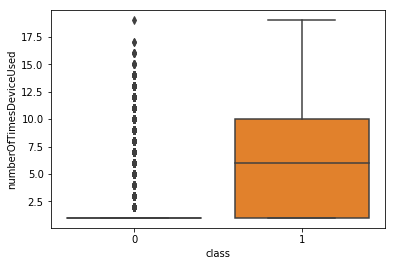

In [29]:
sns.boxplot(data=Transactions,x="class",y="numberOfTimesDeviceUsed")

##### Q5 -- Create a box plot of *user_id* by the target variable *class*

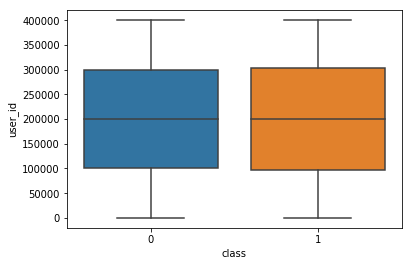

In [30]:
sns.boxplot(data=Transactions,y="user_id",x="class")


There are as many *user_id*s as the number of rows. So, the _user_id*s are unique to each user, it probably won't have any impact on the target variable. But let's just verify this visually by using a box plot.


##### Q6 -- Create a box plot of *purchase_value* by the target variable *class*

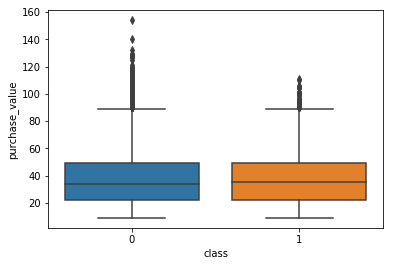

In [31]:
sns.boxplot(data=Transactions,y="purchase_value",x="class")

##### Q7 -- Create a box plot of *age* by the target variable *class*

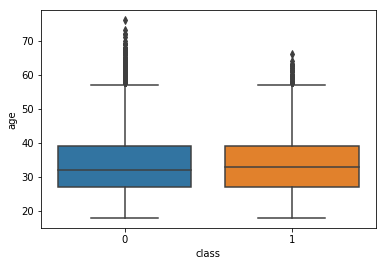

In [32]:
sns.boxplot(data=Transactions,y="age",x="class")

##### Q8 -- Create a box plot of *timeBetween* by the target variable *class*

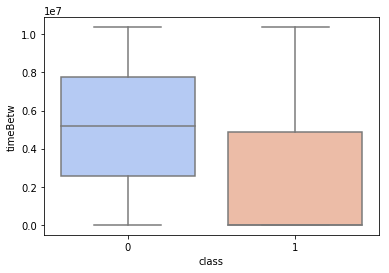

In [33]:
sns.boxplot(data=Transactions,y="timeBetw",x="class",palette='coolwarm')

##### Q9 -- Create a summary of the continuous variables: *timeBetween, numerOfTimesDeviceUsed, age and purchase_value* by the target variable *class* to show the average value by each *class* value (Your table should have at least the columns mentioned, there will not be a point deduction for extra columns). Interpret the table: do any of these variables seem important?

In [35]:
ClassPV=pd.pivot_table(Transactions,index="class", values=["timeBetw","numberOfTimesDeviceUsed","age","purchase_value"],aggfunc=np.mean)
ClassPV

,age,numberOfTimesDeviceUsed,purchase_value,timeBetw
class,,,,
0,33.109496,1.094551,36.862344,5.191655e+06
1,33.277319,5.856902,37.066134,2.437529e+06


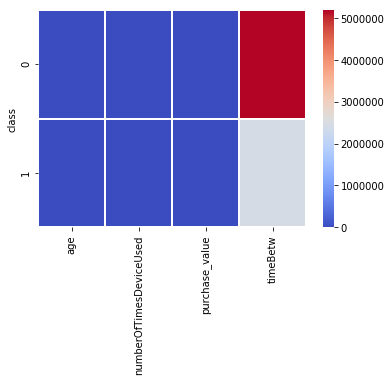

In [36]:
sns.heatmap(ClassPV,cmap='coolwarm',linecolor='white',linewidths=1)

In [37]:
#Same summary with groupby
SummCV=Transactions.groupby(["class"])[["timeBetw","numberOfTimesDeviceUsed"]]## ,"age","purchase_value"]]
SummCV1=Transactions.groupby(["class"])[["age","purchase_value"]]

In [38]:
len(SummCV.get_group(0))

108735

In [39]:
len(SummCV1.get_group(1))

11265

In [40]:
SummCV=SummCV.describe()
SummCV1=SummCV1.describe()
SummCV

timeBetw                                                           \
          count          mean           std    min        25%        50%   
class                                                                      
0      108735.0  5.191655e+06  2.990558e+06  120.0  2586030.0  5191200.0   
1       11265.0  2.437529e+06  3.318875e+06    0.0        0.0        0.0   

                             numberOfTimesDeviceUsed                           \
             75%         max                   count      mean       std  min   
class                                                                           
0      7784160.0  10367940.0                108735.0  1.094551  0.667623  1.0   
1      4849260.0  10363980.0                 11265.0  5.856902  4.697918  1.0   

                             
       25%  50%   75%   max  
class                        
0      1.0  1.0   1.0  19.0  
1      1.0  6.0  10.0  19.0

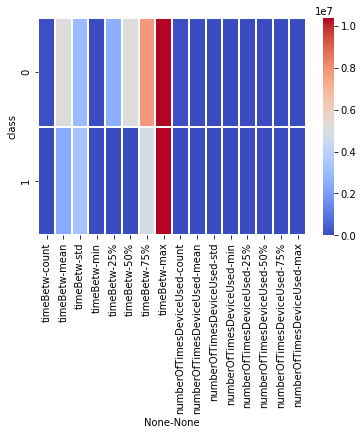

In [41]:
sns.heatmap(SummCV,cmap='coolwarm',linecolor='white',linewidths=1)

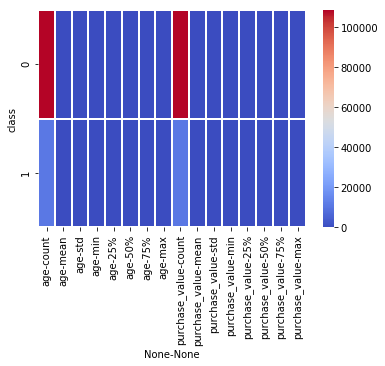

In [42]:
sns.heatmap(SummCV1,cmap='coolwarm',linecolor='white',linewidths=1)

In [57]:
### Let us interpret the CORR() between timeBetw variable to other numberical/continuous attributes.
Transactions.corr()['timeBetw'].sort_values(ascending=False)

timeBetw                   1.000000
ip_address                 0.004694
purchase_value             0.001028
user_id                   -0.000779
age                       -0.001165
class                     -0.256814
numberOfTimesDeviceUsed   -0.327799
Name: timeBetw, dtype: float64

In [45]:
### Interpretation is that Target variable 1 was done between 0 second and 2.5 seconds which are suspicious transactioons.
### The numberOfTimesDeviceUsed on Class 1 fradulent transactions are high compated to Class 0 transactions. 
### Let us interpret the CORR() between timeBetw variable to other numberical/continuous attributes. 
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247173715F8>,
      dtype=object)

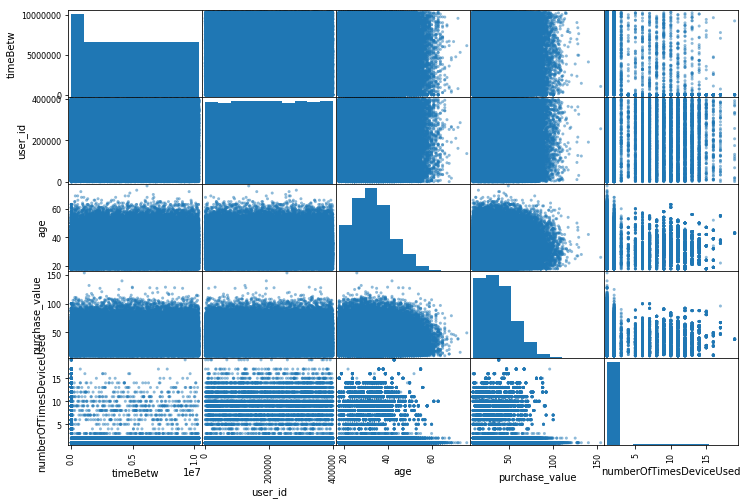

In [46]:
attributes = ["timeBetw", "user_id", "age","purchase_value","numberOfTimesDeviceUsed"]
scatter_matrix(Transactions[attributes],figsize=(12, 8))

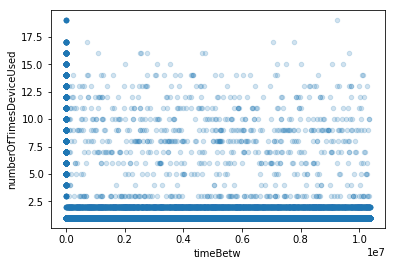

In [73]:
Transactions.plot(kind="scatter", x="timeBetw", y="numberOfTimesDeviceUsed",alpha=0.2)

### Categorical Variables

When looking at categorical variables, we want to make sure that they are equally distributed in the data table to assess their impact on the target variable. If one categorical variable shows up considerable more (or less) than the others, we might have bias in the dataset that we'll have to deal with before going into building models.


##### Q10 -- Create a bar plot that shows the different categories of *source* variable

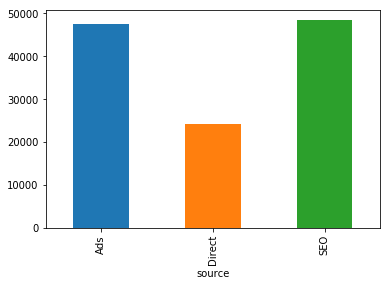

In [47]:
Transactions.groupby(['source'])["device_id"].count().plot.bar()

##### Q11 -- Create a bar plot that shows the different categories of *browser* variable

In [49]:
browser=Transactions.groupby(['browser'])["device_id"].count()


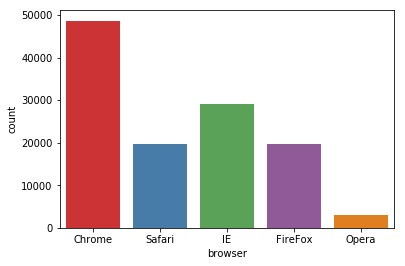

In [50]:
sns.countplot(x='browser',data=Transactions,palette="Set1")

##### Q12 -- Create a bar plot that shows the different categories of *sex* variable

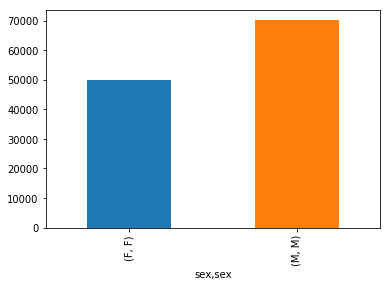

In [51]:
Transactions.groupby(['sex'])['sex'].value_counts().plot.bar()

In [52]:
import seaborn as sns

##### Q13 -- Create a bar plot that shows the different categories of *sex* variable colored by the value of *class* variable

In [53]:
x=Transactions.groupby(['sex'])['class'].value_counts()
x

sex  class
F    0        45302
     1         4572
M    0        63433
     1         6693
Name: class, dtype: int64

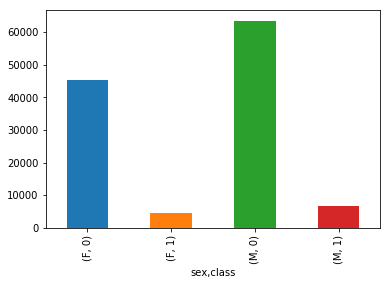

In [54]:
Transactions.groupby(['sex'])['class'].value_counts().plot.bar()

##### Q14 -- Create a bar plot that shows the different categories of *browser* variable colored by the value of *class* variable

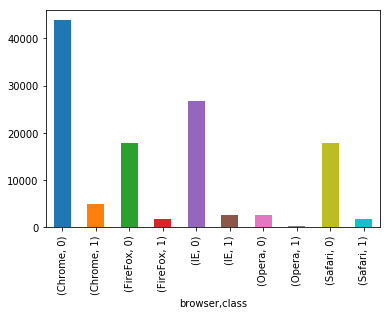

In [55]:
Transactions.groupby(['browser'])['class'].value_counts().plot.bar(stacked=True)

## Target variable

0    108735
1     11265
Name: class, dtype: int64

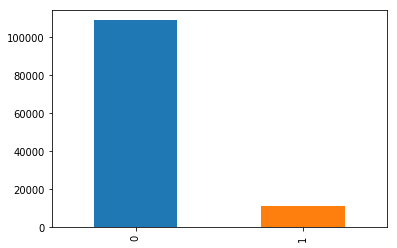

In [56]:
Transactions['class'].value_counts().plot.bar()
Transactions['class'].value_counts()

###### There is a big imbalance between fraudulent (*class=1*) and normal(*class=0*) transactions, we need to keep this in mind when building models.

### Insight from data exploration:

   - Time between signup and purchase and how many times the same device was used are important, we'll explore the relationship between target variable and the new features that we created *timeBetween* and *numberOfTimesDeviceUsed* in detail
   - Looks like the categorical values are sampled similarly for both values of target variable, no concern for sampling bias 

#### Time between the signup and purchase

In [58]:
# total number of fraudulent transactions
totalFraudulent = len(Transactions[Transactions['class'] == 1])
print('total number of fraudulent transactions : ', totalFraudulent)

total number of fraudulent transactions :  11265


In [59]:
## find the cases where timeBetween is zero (just signed up to make a purchase)
zeroSecondsTransactions = Transactions[(Transactions['timeBetw'] == 0)]
fraudulentAtZeroSeconds = len(zeroSecondsTransactions[zeroSecondsTransactions['class']==1])
nonFraudulentAtZeroSeconds = len(zeroSecondsTransactions[zeroSecondsTransactions['class']==0])

print('total number of fraudulent transactions at zero seconds : ', fraudulentAtZeroSeconds)
print('total number of NONfraudulent transactions at zero seconds : ', nonFraudulentAtZeroSeconds)
print('if the customer makes a purchase at ZERO seconds after signup, these transactions are FRAUDULENT ', round(100*fraudulentAtZeroSeconds/len(zeroSecondsTransactions),2) ,'% of the time' )
ratio = round(100*(fraudulentAtZeroSeconds/totalFraudulent),2)
print('In the given dataset ', ratio,'% of fraudulent transactions happen at ZERO seconds from signup')

total number of fraudulent transactions at zero seconds :  5936
total number of NONfraudulent transactions at zero seconds :  0
if the customer makes a purchase at ZERO seconds after signup, these transactions are FRAUDULENT  100.0 % of the time
In the given dataset  52.69 % of fraudulent transactions happen at ZERO seconds from signup


#### Number of times the same device was used

In [60]:
deviceUsedMoreThanOnce = Transactions[(Transactions['numberOfTimesDeviceUsed'] > 1)]
print(len(deviceUsedMoreThanOnce), ' of the records show that the same device was used more than once')

13614  of the records show that the same device was used more than once


13614  of the transactions show that the same device was used more than once

In [61]:
fraudulentMultipleUse = deviceUsedMoreThanOnce[deviceUsedMoreThanOnce['class'] == 1]
print( ' Of these ', len(deviceUsedMoreThanOnce), ' transactions, ', len(fraudulentMultipleUse), 'of them are fraudulent ---', round(100*len(fraudulentMultipleUse)/len(deviceUsedMoreThanOnce),2), '% of the time')

 Of these  13614  transactions,  7685 of them are fraudulent --- 56.45 % of the time


##### Q15 -- What is the percentage of the fraudulent transactions occur when a device was used multiple times? 

In [62]:
print('Percetage of Fradulent trans when multiple times devices are used: {} %'.format(round(100*len(fraudulentMultipleUse)/len(deviceUsedMoreThanOnce),2)))


Percetage of Fradulent trans when multiple times devices are used: 56.45 %


There are 2 important predictors: time between signup and purchase and if the same device was used. So a critical user action to watch out for would be if a new userid is created on a previously used device to make a purchase right after sign up. 
    

Let's check the sampling of the target *class*. We want to make sure that there is equal (--ish) representation of both classes to build a reliable model.


##### Q16 -- What percentage of all the transactions in our dataset were fraudulent transactions?

In [63]:
print('Percentage of Fradulent Transactions in our dataset is {} %'.format(round(100*(totalFraudulent/len(Transactions)),2)))

Percentage of Fradulent Transactions in our dataset is 9.39 %


One last step before going into modeling is to check to see if there are any missing values.

##### Q17 - Build a heatmap that highlights if there are any missing values in this dataset and verify your results by using pandas info() function

In [64]:
missingV=Transactions.isna()


In [65]:
missingV.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,timeBetw,numberOfTimesDeviceUsed
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


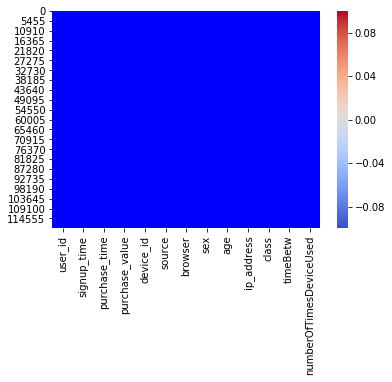

In [66]:
sns.heatmap(missingV,cmap='coolwarm',linecolor='blue',linewidths=1)

In [67]:
### No Missing vlaues; heat map is denoted with only one base color. 
infor=Transactions.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 0 to 119999
Data columns (total 13 columns):
user_id                    120000 non-null int64
signup_time                120000 non-null datetime64[ns]
purchase_time              120000 non-null datetime64[ns]
purchase_value             120000 non-null int64
device_id                  120000 non-null object
source                     120000 non-null object
browser                    120000 non-null object
sex                        120000 non-null object
age                        120000 non-null int64
ip_address                 120000 non-null float64
class                      120000 non-null int64
timeBetw                   120000 non-null float64
numberOfTimesDeviceUsed    120000 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(5), object(4)
memory usage: 17.8+ MB


#### Q18 (3 pts) --- Summarize your findings and indentify next steps on building a model to identify fraudulent transactions when they occure. DO NOT BUILD ANY MODELS. This questions is about presenting your findings in a way that it will make sense to the management to extend the contract to follow up and build models.


In [69]:
'''
Summary: Feature Engineering was done to create new features with the given dataset. "TimeBetween and numberOfTimesDeviceUsed"
* TimeBetween (Signup Time - Purchase Time) is the top feature/estimator of importance to identify the fradulent transactions. 
* Second feature/estimator of importance would be the numberOfTimesDeviceUsed. 
If the same device was used two or more times for a user-id signup and if the timeBetween is close to ZERO seconds; 
then they are confirmed fradulent Class 1 Transactions. These two estimators are highly correlated to the Class Variable. 
Model:
* Since we do not have any missing values; we do NOT have to use any imputer classifiers.
* We can also eliminate any preprocessing algorithms since we are directly using two conintous variable that are calculated/dervied.
* We should use "TimeBetween and numberOfTimesDeviceUsed" estimators and create a learning algorithm that identifies the 
fradulent transactions with high accuracy. 
* We should use CV and also other regularization techniques to tune the hyperparameters to provide optimized results on accuracy. 
Conclusion:
    Once we have an optimized learning algorithm; we should couple that with the online system to observe the environment for fradulant 
    transactions. Once a fradulent transaction in triggered; an AGENT should catch that based on the POLICY defined for fradulent 
    transactions and should reject the online order. 
    A customer care representative should follow up to make sure the transaction was infact fradulent. 

!!!These steps would identify a fraudulent transaction and prevent loss worth hunderds/thousands of dollars for my customer!!!
'''

'\nSummary: Feature Engineering was done to create new features with the given dataset. "TimeBetween and numberOfTimesDeviceUsed"\n* TimeBetween (Signup Time - Purchase Time) is the top feature/estimator of importance to identify the fradulent transactions. \n* Second feature/estimator of importance would be the numberOfTimesDeviceUsed. \nIf the same device was used two or more times for a user-id signup and if the timeBetween is close to ZERO seconds; \nthen they are confirmed fradulent Class 1 Transactions. These two estimators are highly correlated to the Class Variable. \nModel:\n* Since we do not have any missing values; we do NOT have to use any imputer classifiers.\n* We can also eliminate any preprocessing algorithms since we are directly using two conintous variable that are calculated/dervied.\n* We should use "TimeBetween and numberOfTimesDeviceUsed" estimators and create a learning algorithm that identifies the \nfradulent transactions with high accuracy. \n* We should use 